Read in `solutions/transient.npy`. This is a (100 x 3) numpy array, containing some time-series measurements from a transient phenomenon. The first column is time (arbitrary units), the second column is the flux (arbitrary units), and the third column are homoescedastic measurement uncertainties on the flux. Plot this data with the uncertainties.


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import emcee

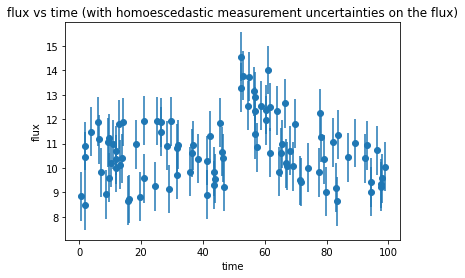

In [48]:
data = np.load('transient.npy')
plt.errorbar(data[:, 0], data[:, 1], yerr=data[:, 2], fmt="o")
plt.xlabel('time')
plt.ylabel('flux')
plt.title('flux vs time (with homoescedastic measurement uncertainties on the flux)')
plt.show()

One possible model for this data is a sharp burst with an exponential tail rising above a nominal background level. This model can be described as:

$y = b$, for $t<t_0$

$y = b + A\exp[-\alpha(t-t_0)]$, for $t\geq t_0$

where $b$ is the background amplitude, $A$ is the burst amplitude, $t_0$ is the burst epoch, and $\alpha$ encodes how rapidly the burst dies off.

Code this burst model, and code a likelihood function for this data with the burst model. *Hint: This is similar in spirit to the likelihood when fitting polynomials to data, except now $x$ is time, and the polynomial model is now the burst model.* 

In [49]:
t_0 =  50
b = 10
A = 14
alfa = 0.5

In [50]:
def y(t):
    if (t < t_0): return b
    else: return b + A * np.exp(-alfa * (t - t_0))

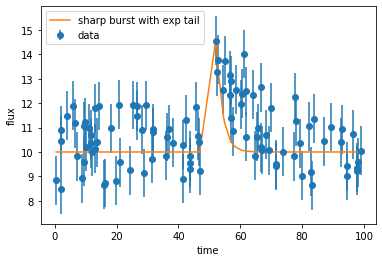

In [51]:
plt.errorbar(data[:, 0], data[:, 1], yerr=data[:, 2], fmt="o", label = 'data')
y_time = [y(data[i, 0]) for i in range(len(data[:, 0]))]
plt.plot(data[:, 0], y_time, label = 'sharp burst with exp tail')
plt.legend()
plt.xlabel('time')
plt.ylabel('flux')
plt.show()

The likelihood function L is defined as produttoria di f(xi, beta) dove f è la pdf di un punto x, con media mu e dev std sigma. If we assume the data to be an independent and identiccaly ditributed samples: then the residuals are from a normal distribution and L is:
$$L \equiv p(\{x_i\}|\mu,\sigma) = \prod_{i=1}^N \frac{1}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(x_i-\mu)^2}{2\sigma^2}\right).$$

In [59]:
sigma = data[0, 2] #errors are homoscedastic

In [61]:
def llh(x, sigma, data):
    # Gaussian likelihood where the prediction is centered on the burst
    #meaning exp(fi - model(ti |A,b, alfa, t0) / 2sigma^2)
    return np.prod(np.exp(-(data-x)**2 /2 /sigma**2))

def log_llh(x, sigma, data):
    return np.log(llh(x, sigma, data))

Using one of the MCMC sampler that we looked at in class (`emcee`, `pymc`), perform a Bayesian analysis that recovers an MCMC chain of posterior probability samples for the joint parameter space of $\{b,A,t_0,\alpha\}$. You must decide on how many samples are appropriate for running your MCMC. For your priors, make them $b\in \mathrm{Uniform}[0,50]$, $A\in \mathrm{Uniform}[0,50]$, $t_0\in \mathrm{Uniform}[0,100]$, and $\ln\alpha\in \mathrm{Uniform}[-5,5]$ (careful: uniform in $\ln\alpha$, not $\alpha$).


In [62]:
n_parameters = 4 #number of parameters, which are b, A, t_0, alfa